<a href="https://colab.research.google.com/github/Prabhjot-Singh-13/Prabhjot-Singh-13/blob/main/01_Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION**
Regression is a statistical method used to analyze the relationship between variables, aiming to predict the value of one variable based on the values of others. It seeks to find the best-fit line or curve that describes the pattern of the data points.

We will cover
* Artitecture of neural regresion model including input and output shapes
*Creating the custom data to view and fit
*Steps in modelling >Creating>Compiling>Fitting>evaluating model
*Different evaluation method
*Saving and loading Models



#INPUT AND OUTPUT OF THE ALGORITHUM
*Independent varibles(Features) converted into numerical encoding(one hot)

*Embedding ,wieghts or feature vectors all are same

Input layer shape>
Hidden layer>
Neuron per layer>
Output layer shape>
Hidden activation>
Output activation>
Loss function>
Optimizer>



In [ ]:
#importing tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

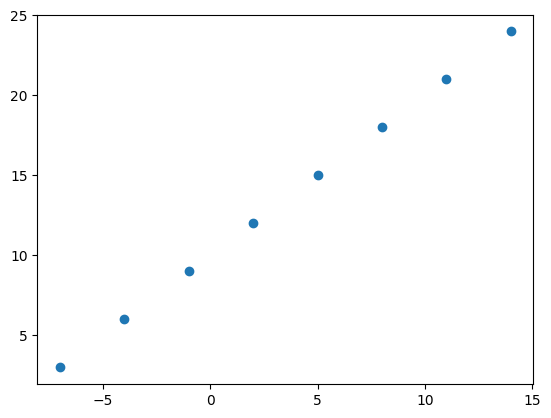

In [ ]:
#we have to create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) #features
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) #labels
#visulization
plt.scatter(X,y)

In [ ]:
#converting Numpy array into tensors
X = tf.constant(X,shape=(8,1))
y = tf.constant(y)
y,X

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>)

## Now lets start modelling this tensor
1. **Creating a model** - Define the imput and output layer as well as hidden layer of deep learning model
2. **Compile a model** - Define the loss fumction and optimizer(tell model how to improve the patterns or wieghts of learming) and evaluation matrics (what we can use to interepret the performance of model)
3. **Fitting the model** - to make predictions

In [ ]:

#X=np.expand_dims(X,axis=-1)
#  X = tf.reshape(X, shape=(-1, 1))
#  if the original X tensor has 8 elements, the reshaped tensor will have 8 rows and 1 column.
 #we do this because  input to the Dense layer in the model is expected to have a minimum of 2 dimensions
#set the global seed to make the data fix
#tf.random.set_seed(13)
#creating the model by using sequesntial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# lets start compiling the model
model.compile(loss=tf.keras.losses.mse,
              optimizer="sgd",#stochastic gradient decent
              metrics=["mse"]
              )
#fitting the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 576ms/step - loss: 545.3358 - mse: 545.3358
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 92.0440 - mse: 92.0440
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 72.7086 - mse: 72.7086
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 69.8053 - mse: 69.8053
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 67.5898 - mse: 67.5898
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 65.4664 - mse: 65.4664
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 63.4105 - mse: 63.4105
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 61.4192 - mse: 61.4192
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 59.4905 - mse: 59.4905
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 57.6223 - mse: 57.6223
Epoch 11/100
1/1 [============================

In [ ]:

y_predict = model.predict([22])
y_predict

1/1 [==============================] - 0s 99ms/step


array([[34.927433]], dtype=float32)



**Improving the model**

we can improve the models by altering the steps that we take while creating the modal

1.**Creating a model** - we might add some more layers,increase the number if hidden laters(Neurons) within each of hidden layer,change the activation function of each layer.
2. **Compiling the model** - we might chnage the optimization function or perhaps the **learning rate** of the otimization function .
3.  **Fitting the model** - we fight fit the model for more epochs

In [ ]:
# Small chnages make more effect on model as compare to large changes
# 1.Create the model (this tim we will add 1 extra layer with 100 units)


In [ ]:
# X=np.expand_dims(X,axis=-1)
 #we do this because  input to the Dense layer in the model is expected to have a minimum of 2 dimensions
#set the global seed to make the data fix
tf.random.set_seed(13)
#creating the model by using sequesntial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name="Input_layer"),
    tf.keras.layers.Dense(100,activation="relu",name="Middle_layer"),
    tf.keras.layers.Dense(1,name="Output_layer")
],name="mymodel")
# lets start compiling the model
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),#stochastic gradient decent
              metrics=["mae"]
              )
#fitting the model
model.fit(X,y,epochs=100,verbose=0)

In [ ]:
y_predict = model.predict([18.0])
y_predict
#when i use sgd i get nan mse but when i used adam i am getting mse 3.89 .beacuse of vanishing gradient
#here model is doing overfititng because mec is reducing but the result is not good and going still out of order
#so here we are not getting the accuracy because here this model does not need NN it just require simple LinearRegression model

1/1 [==============================] - 0s 81ms/step


array([[28.28845]], dtype=float32)

##Evaluating a model
In practice, a typical workflow you'll go through when building neural network is that :
* Create a model
* Compile the model
* Fit the model
* Evaluate the model
* Repeat until satisfied
* Visulaize,Visualize,Visualize


*** model.summary()

*Totol Parammeters - Total no. of parameters in model

*Trainable Parameters - These are the parameters(patterns) the model can update as it trains

*Non Trainable Parameters - These parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

In [ ]:
model.summary()


Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Middle_layer (Dense)        (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


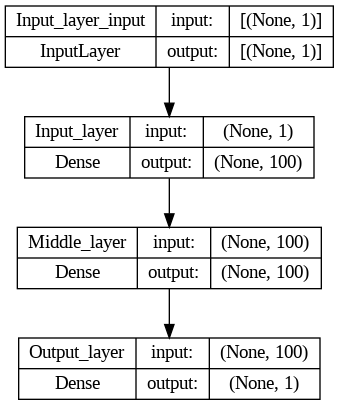

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

###Evaluation our model's predictions with regression evaluation metrics
Depending on the problem type, there are different evaluation metrics

MAE - Mean absolute error, "on average, how wrong is each of my model's predictions" tf.metrics.mean_absolute_error(y_test,y_pred)

MSE - Mean square error, "square the average errors"

when you have to compare tensors you must have both variables in tensor form and also having same shape, You can do squeeze or add extra dims

 Tensorboard - a compnent of tensorflow for visualization

 weights and biases - a way to visualize learning of model     

** To save the model**

two ways to save the model

1. savedmodel format
2. HDF5 file


In [1]:
#By using the SavedModel format
model.save("demo_regression_model")

NameError: name 'model' is not defined